<a href="https://colab.research.google.com/github/atikhasan007/Computer-Vision/blob/main/image_classification_with_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
!nvidia-smi

Fri Jan 30 04:31:07 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   77C    P0             35W /   70W |     362MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [73]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("samuelcortinhas/apples-or-tomatoes-image-classification")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'apples-or-tomatoes-image-classification' dataset.
Path to dataset files: /kaggle/input/apples-or-tomatoes-image-classification


In [74]:
train_path = "/kaggle/input/apples-or-tomatoes-image-classification/train"
valid_path = "/kaggle/input/apples-or-tomatoes-image-classification/test"

In [75]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.layers import BatchNormalization, Dropout

In [76]:
import glob
folders = glob.glob(train_path)

In [77]:
folders

['/kaggle/input/apples-or-tomatoes-image-classification/train']

In [78]:
num_of_class = len(folders)
num_of_class

1

In [79]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid',
                 activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))


model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))


model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))


model.add(Flatten())

#ann
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [80]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']

)

# just training data is agumented

In [81]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [82]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)
test_datagen = ImageDataGenerator(rescale = 1./255) # not augmentend


In [83]:
training_set = train_datagen.flow_from_directory(
    train_path,
    target_size = (256,256),
    batch_size = 32,
    class_mode = 'binary'

)

Found 294 images belonging to 2 classes.


In [84]:
test_set = test_datagen.flow_from_directory(
    valid_path,
    target_size = (256,256),
    batch_size = 32,
    class_mode = 'binary'

)

Found 97 images belonging to 2 classes.


In [96]:
history = model.fit(
    training_set,
    validation_data = test_set,
    epochs = 20,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 454ms/step - accuracy: 0.9696 - loss: 0.0625 - val_accuracy: 0.7835 - val_loss: 1.5315
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 523ms/step - accuracy: 0.9722 - loss: 0.0615 - val_accuracy: 0.7835 - val_loss: 1.6313
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 728ms/step - accuracy: 0.9601 - loss: 0.0775 - val_accuracy: 0.8041 - val_loss: 2.0257
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 946ms/step - accuracy: 0.9712 - loss: 0.0498 - val_accuracy: 0.8041 - val_loss: 2.1179
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 520ms/step - accuracy: 0.9716 - loss: 0.0617 - val_accuracy: 0.8041 - val_loss: 1.3637
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 659ms/step - accuracy: 0.9743 - loss: 0.1688 - val_accuracy: 0.8144 - val_loss: 1.1880
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 816ms/step - accuracy: 0.9754 - loss: 0.0915 - val_accuracy: 0.7938 - val_loss: 1.4417
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 814ms/step - accuracy: 0.9754 - loss: 0.1006 - val_accuracy: 

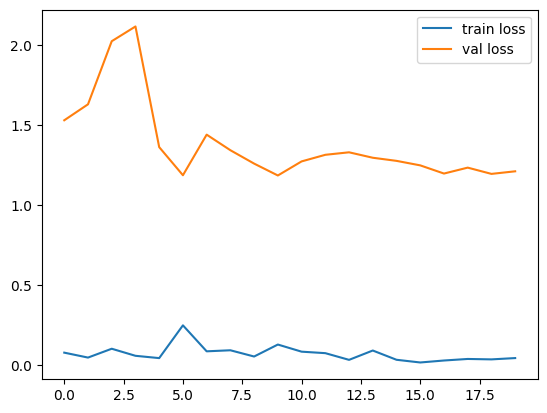

In [97]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()


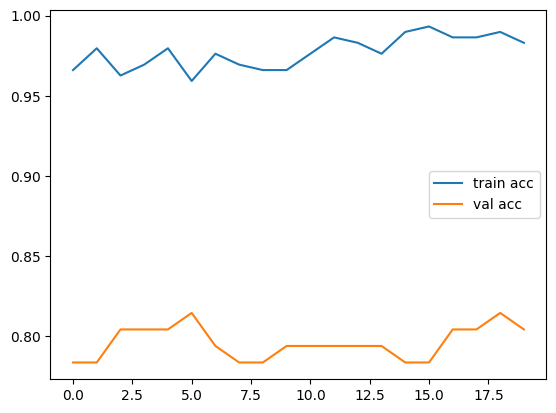

In [98]:
# plot the accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


In [99]:
model.evaluate(test_set)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7789 - loss: 1.3135


[1.2125492095947266, 0.8041236996650696]

In [100]:
model.save('model.h5')


In [101]:
from tensorflow.keras.models import load_model
model = load_model('model.h5')


In [106]:
from tensorflow.keras.utils import load_img
img = load_img('/kaggle/input/apples-or-tomatoes-image-classification/test/tomatoes/img_p1_107.jpeg', target_size=(256, 256))

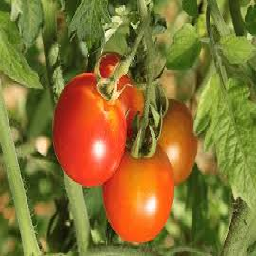

In [113]:
img

In [107]:
import numpy as np



In [109]:
from tensorflow.keras.preprocessing import image
x = image.img_to_array(img)
x = x/255
x= np.expand_dims(x, axis=0)
output = model.predict(x)
print(output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
[[0.99999905]]


In [110]:
x.shape

(1, 256, 256, 3)

In [111]:
output[0][0]

np.float32(0.99999905)

In [112]:
if output[0][0] >= 0.5:
  prediction = "Tomato"
  print(prediction)
else:
  prediction = "Apple"
  print(prediction)

Tomato
